## YouTube Trending Project
Analyzing data from the YouTube trending page in the US
over the span of a few days (10/23-27/2020)

Goal: 
* To understand common characteristics of trending videos in the US

* Use this knowledge to build predictive models

* To predict engagement (likes or comments) on a video in english speaking countries

## Table of Contents:
* 1. Exploratory Data Analysis
    * 1.1 Data Analysis 
* 2. Cleaning
* 3. Modeling

### 1. Exploratory Data Analysis
##### Loading Data and Libraries


In [1]:
import helpers
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = helpers.load_df("../YouTube-Trending/Data/US_Data.csv")

trend_df = df.copy()

trend_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,country
0,bPiofmZGb8o,Second 2020 Presidential Debate between Donald...,2020-10-23T02:49:33Z,UCb--64Gl51jIEVE-GLDAVTg,C-SPAN,25,20.23.10,C-SPAN|CSPAN|2020|Donald Trump|Republican|Whit...,6641600,94601,6209,59293,https://i.ytimg.com/vi/bPiofmZGb8o/default.jpg,False,False,President Donald Trump and former Vice Preside...,1H59M15S,US
1,tcYodQoapMg,Ariana Grande - positions (official video),2020-10-23T04:00:10Z,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,10,20.23.10,ariana grande positions|positions ariana grand...,7516529,1485130,10810,140549,https://i.ytimg.com/vi/tcYodQoapMg/default.jpg,False,False,The official “positions” music video by Ariana...,2M58S,US
2,np9Ub1LilKU,Jack Harlow - Tyler Herro [Official Video],2020-10-22T19:00:14Z,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,20.23.10,jack harlow|jack rapper|harlow rapper|private ...,1499338,153028,2006,11013,https://i.ytimg.com/vi/np9Ub1LilKU/default.jpg,False,False,Jack Harlow - Tyler HerroListen now: https://J...,3M,US
3,5S4bm3bAt9Y,SURPRISING BEST FRIEND WITH BORAT!!,2020-10-21T19:56:24Z,UCef29bYGgUSoJjVkqhcAPkw,David Dobrik Too,22,20.23.10,[none],5320147,596894,7044,33648,https://i.ytimg.com/vi/5S4bm3bAt9Y/default.jpg,False,False,Thank you Borat for coming over!! I like youWa...,5M55S,US
4,GuEkHIgR46k,Bryson Tiller - Always Forever (Official Video),2020-10-22T16:00:08Z,UCwhe-6skwaZxLomc-U6Wy1w,BrysonTillerVEVO,10,20.23.10,Bryson Tiller 2020|Bryson Tiller Serenity|Brys...,862087,82059,657,4459,https://i.ytimg.com/vi/GuEkHIgR46k/default.jpg,False,False,A N N I V E R S A R Y OUT NOW!Stream/Download:...,2M59S,US


### 1.1 Data Overview
* ##### 1.1.1 Raw data information


In [2]:
np.shape(trend_df)

(1400, 18)

In [3]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1400 non-null   object
 1   title              1400 non-null   object
 2   publishedAt        1400 non-null   object
 3   channelId          1400 non-null   object
 4   channelTitle       1400 non-null   object
 5   categoryId         1400 non-null   int64 
 6   trending_date      1400 non-null   object
 7   tags               1400 non-null   object
 8   view_count         1400 non-null   int64 
 9   likes              1400 non-null   int64 
 10  dislikes           1400 non-null   int64 
 11  comment_count      1400 non-null   int64 
 12  thumbnail_link     1400 non-null   object
 13  comments_disabled  1400 non-null   bool  
 14  ratings_disabled   1400 non-null   bool  
 15  description        1391 non-null   object
 16  duration           1400 non-null   object


### 1.2 Data Curation
* ##### 1.2.1 Feature Engineering
* ##### 1.2.2 Data Preprocessing

In [4]:
# Preprocessing Data for Analysis
helpers.featureEng(trend_df)
helpers.preprocess(trend_df)

,categoryId,likeRatio,likes_log,views_log,dislikes_log,comment_log,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
0,25,0.876818,11.457423,15.708863,8.733755,10.990247,0 days,1,59,15,66,12
1,10,0.985548,14.211013,15.832615,9.288227,11.853311,0 days,0,2,58,42,22
2,10,0.974122,11.938376,14.220534,7.603898,9.306832,1 days,0,3,0,42,26
3,22,0.976673,13.299495,15.487011,8.859931,10.423709,2 days,0,5,55,35,0
4,10,0.984114,11.315194,13.667111,6.487684,8.402680,1 days,0,2,59,47,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,20,0.962528,11.907141,14.719127,7.948738,8.633019,7 days,0,14,9,27,33
1396,20,0.985037,13.722147,16.319021,8.834337,10.837500,8 days,0,10,3,44,0
1397,27,-0.115261,10.345799,15.658103,10.577350,9.482883,6 days,0,1,38,38,5
1398,27,0.952679,10.338738,13.550919,6.618739,7.767687,6 days,0,9,3,49,18


In [6]:
trend_df.dtypes

categoryId                int64
likeRatio               float64
likes_log               float64
views_log               float64
dislikes_log            float64
comment_log             float64
days_lapse      timedelta64[ns]
durationHr                int64
durationMin               int64
durationSec               int64
titleLength               int64
tagCount                  int64
dtype: object

In [8]:
# Descriptive Statistics of the curated dataset
trend_df.describe()

,categoryId,likeRatio,likes_log,views_log,dislikes_log,comment_log,days_lapse,durationHr,durationMin,durationSec,titleLength,tagCount
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,18.506236,0.940036,10.969317,14.077004,6.993690,8.508670,3 days 14:51:40.807043,0.026412,9.575202,28.236244,51.073368,19.096112
std,7.545977,0.104756,1.371794,1.099641,1.348934,1.337027,1 days 23:32:44.751398,0.197356,9.405884,18.151183,20.259525,12.162942
min,1.000000,-0.292719,6.126869,10.412021,3.044522,4.382027,0 days 00:00:00,0.000000,0.000000,0.000000,4.000000,0.000000
25%,10.000000,0.938668,10.025373,13.292342,6.041438,7.626325,2 days 00:00:00,0.000000,3.000000,13.000000,38.000000,9.000000
50%,22.000000,0.964936,10.943923,13.998706,6.830874,8.434246,4 days 00:00:00,0.000000,6.000000,28.000000,48.000000,20.000000
75%,24.000000,0.980011,11.870000,14.815868,7.935936,9.352491,5 days 00:00:00,0.000000,14.000000,44.000000,63.500000,29.000000
max,29.000000,0.998719,14.925165,17.582435,10.902703,13.542816,19 days 00:00:00,2.000000,59.000000,59.000000,100.000000,60.000000


# Heat Map 
Checking for missing variables using heat map

<AxesSubplot:>

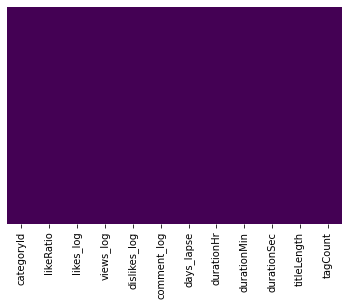

In [9]:
sns.heatmap(trend_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

Checking for normal distribution of views, likes, dislikes, and comment counts

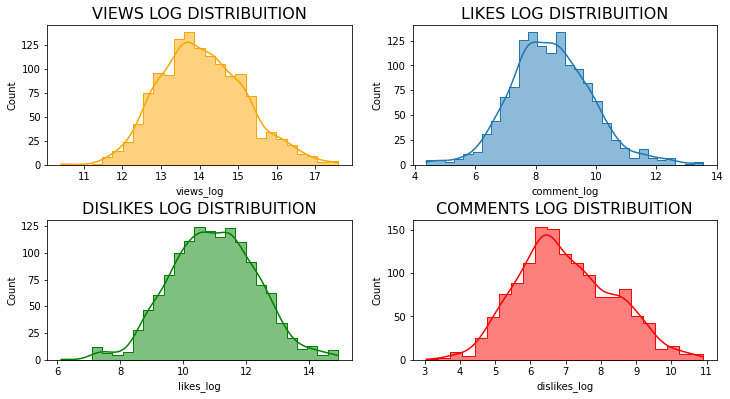

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

g1 = sns.histplot(ax=axes[0, 0], data=trend_df, x="views_log", kde=True, element="step", color="orange")
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

g2 = sns.histplot(ax=axes[0,1], data=trend_df, x="comment_log", kde=True, element="step")
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

g3 = sns.histplot(ax=axes[1,0], data=trend_df, x="likes_log", kde=True, element="step", color="green")
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

g4 = sns.histplot(ax=axes[1,1], data=trend_df, x="dislikes_log", kde=True, element="step", color="red")
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


In [11]:
print(len(helpers.findOutliers(trend_df['views_log'])))

1276


# Category Dictionary
- 2 - Autos & Vehicles 
- 1 - Film & Animation
- 10 - Music
- 17 - Sports
- 19 - Travel & Events
- 20 - Gaming
- 22 - People & Blogs
- 23 - Comedy
- 24 - Entertainment
- 25 - News & Politics
- 26 - Howto & Style
- 27 - Education
- 28 - Science & Technology
- 29 - Nonprofits & Activism 
<br> More at: https://gist.github.com/dgp/1b24bf2961521bd75d6c



In [12]:
# Figuring out the popular categories
trend_df.categoryId.value_counts()

10    318
24    264
17    168
28    109
20    100
22     94
23     77
26     68
1      47
2      38
27     33
25     30
29     11
19      5
15      1
Name: categoryId, dtype: int64

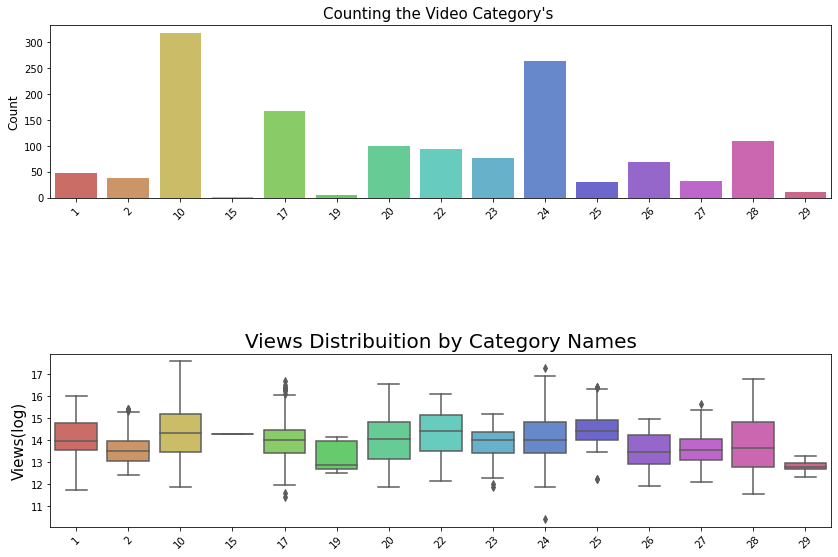

In [13]:
plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot(x='categoryId', data=trend_df, palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='categoryId', y='views_log', data=trend_df, palette="hls")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Music, Entertainment, and Sports have the most videos.



# Correlation Matrix

<AxesSubplot:>

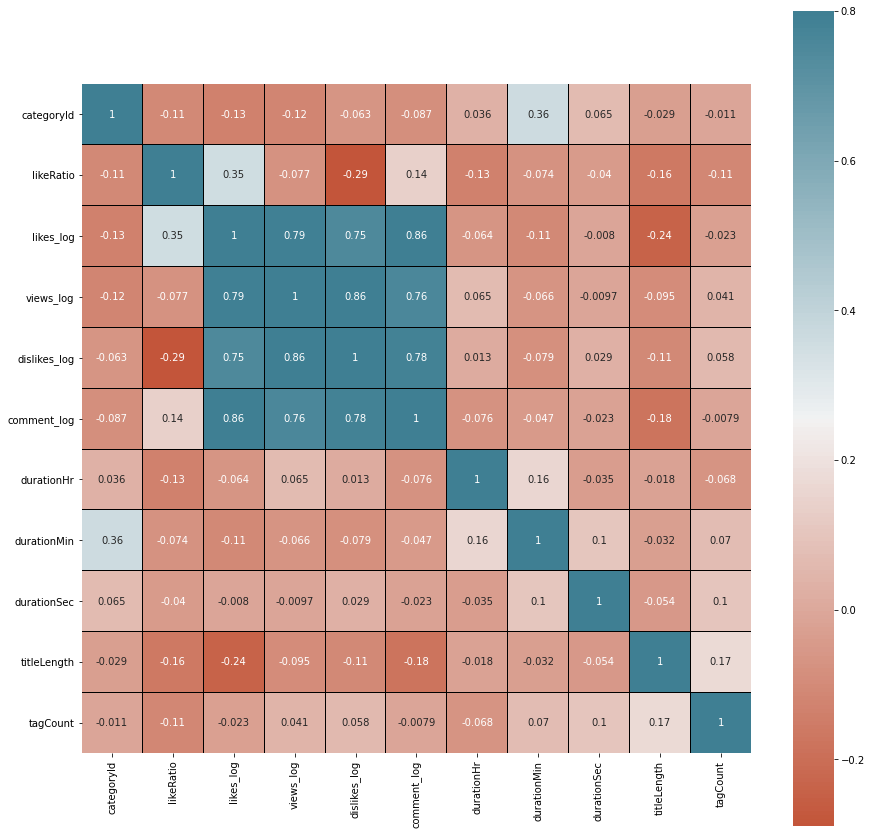

In [14]:
corr = trend_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap = sns.diverging_palette(20, 220, n=200), linecolor='black')
